<a href="https://colab.research.google.com/github/forestser/Pyhton/blob/main/dataton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [285]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')
print('train shape: ', train_df.shape)
print('test shape: ', test_df.shape)

train shape:  (9375, 10)
test shape:  (4018, 9)


In [286]:
y_train = train_df.pop('body fat_%')

print(train_df.shape)
print(y_train.shape)

(9375, 9)
(9375,)


In [287]:
train_df.loc[train_df['gender'] == 'M','gender'] = 0
train_df.loc[train_df['gender'] == 'F','gender'] = 1
test_df.loc[test_df['gender'] == 'M','gender'] = 0
test_df.loc[test_df['gender'] == 'F','gender'] = 1
test_df.head()
train_df.head()

,age,gender,height_cm,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,23.0,0,173.7,87.0,143.0,52.9,18.0,57.0,233.0
1,24.0,0,181.6,65.0,126.0,45.1,8.3,38.0,254.0
2,36.0,1,166.5,84.0,130.0,27.4,18.9,40.0,186.0
3,22.0,1,165.8,77.0,130.0,29.7,19.0,30.0,183.0
4,61.0,1,144.7,77.0,130.0,20.7,11.8,7.0,126.0


In [288]:


print(train_df.shape)
print(test_df.shape)

(9375, 9)
(4018, 9)


In [289]:
from sklearn.preprocessing import StandardScaler 

# 학습 및 평가 데이터를 DataFrame 형태로 입력받아 정규화된 데이터로 변환하는 함수 
def scale(x_train, x_test):
    columns = x_train.columns

    scaler = StandardScaler()

    # 학습 데이터의 age ~ broad jump_cm 열에 해당하는 값을 가져와 피팅 시킵니다.
    scaler.fit(x_train)

    # 피팅된 scaler를 기준으로 학습데이터를 정규화합니다.
    x_train = scaler.transform(x_train)
    # 평가 데이터도 마찬가지로 학습 데이터로 피팅된 scaler를 기준으로 정규화를 진행합니다.
    x_test = scaler.transform(x_test)

    # DataFrame 형태로 변환하여 반환합니다.
    x_train = pd.DataFrame(columns=columns, data=x_train)
    x_test = pd.DataFrame(columns=columns, data=x_test)

    return x_train, x_test

# 학습 데이터, 평가 데이터를 정의한 scale 함수에 전달하여 정규화된 학습 및 평가 데이터를 x_train, x_test에 저장합니다.
x_train, x_test = scale(train_df, test_df)

In [290]:
# 학습을 수행하기 전에 모델 학습이 제대로 진행되었는지 확인하기 위해 검증셋을 분리해 놓습니다.
# 검증셋은 학습에 사용하지 않고 모델을 평가하기 위해 사용됩니다.
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(8437, 9) (8437,)
(938, 9) (938,)


In [291]:
y_train = y_train.astype('float')

In [292]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# model = AdaBoostClassifier()

# model.fit(x_train, y_train)

In [293]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델을 선언합니다.
model = LinearRegression()

# 학습 feature 데이터(x_train)과 target 데이터(y_test)를 학습합니다.
# 검증셋(x_valid, y_valid)는 학습을 하지 않고, 학습된 모델 평가를 위해 사용됩니다.
model.fit(x_train, y_train)

LinearRegression()

In [294]:
# 검증셋을 예측해봅니다.
pred_valid = model.predict(x_valid)
print(pred_valid.shape)

(938,)


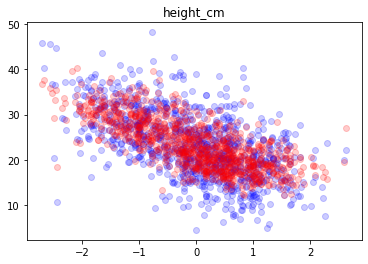

In [295]:
# 학습 데이터 특징 중 신장(height_cm) 정보만 가져와 모델에 잘 피팅 되었는지 검증셋의 예측 결과와 정답을 비교해봅니다.
plt.figure()
plt.scatter(x_valid['height_cm'], y_valid, color='blue', alpha=0.2, label='label') #정답
plt.scatter(x_valid['height_cm'], pred_valid, color='red', alpha=0.2, label='pred') #예측값
plt.title('height_cm')
plt.show()

In [296]:
# 검증 데이터로 MAE 에러율을 확인해 봅니다.
from sklearn.metrics import mean_absolute_error

valid_mae = mean_absolute_error(y_valid, pred_valid)
print('Validation MAE: ', valid_mae)


Validation MAE:  3.918522112447197


In [297]:
preds = model.predict(x_test)
print(preds.shape)

(4018,)


In [298]:
# 제출파일 예시 파일을 읽어와 predict 열에 평가셋 예측값을 기록하여 저장합니다.
submit = pd.read_csv('./dataset/submit_sample.csv')
submit['predict'] = preds
submit.to_csv('submit_sample2.csv', index=False)


In [301]:
model_dic = {
    "Nearest Neighbors" : KNeighborsClassifier(3),
    "Linear SVM" : SVC(kernel="linear", C=0.025),
    "RBF SVM" : SVC(gamma=2, C=1),
    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree" : DecisionTreeClassifier(max_depth=5),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB(),
    "QDA" : QuadraticDiscriminantAnalysis()
}

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))

In [306]:
# 필요한 모듈과 데이터 불러오기

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [307]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN입니다.
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn)], voting='soft')

# 데이터를 훈련셋과 테스트셋으로 나누기
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=156)

# 보팅 분류기의 학습/예측/평가
voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)

# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386
